In [1]:
# Preliminary
## Columnar analysis basics.
import uproot
import awkward as ak
## Plotting.
import matplotlib.pyplot as plt

# Hists
import hist
from hist import Hist

# NanoEvents
from coffea.nanoevents import NanoEventsFactory, BaseSchema
# Processors
import coffea.processor as processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

import numpy as np

In [2]:
fname   = "/eos/home-b/bchitrod/HHH/NANOAOD/TRSM_XToHY_6b_M3_2000_M2_1100_NANOAOD.root"

In [3]:
eventsToRead = 10000
events = NanoEventsFactory.from_root(fname,schemaclass=NanoAODSchema,metadata={"dataset": "testSignal"},entry_stop=eventsToRead).events()
events

<NanoEventsArray [<event 1:1:9901>, ... <event 1:1:2500>] type='10000 * event'>

In [4]:
events.FatJet.fields

['area',
 'btagCMVA',
 'btagCSVV2',
 'btagDDBvL',
 'btagDDBvLV2',
 'btagDDBvL_noMD',
 'btagDDCvB',
 'btagDDCvBV2',
 'btagDDCvB_noMD',
 'btagDDCvL',
 'btagDDCvLV2',
 'btagDDCvL_noMD',
 'btagDeepB',
 'btagHbb',
 'deepTagMD_H4qvsQCD',
 'deepTagMD_HbbvsQCD',
 'deepTagMD_TvsQCD',
 'deepTagMD_WvsQCD',
 'deepTagMD_ZHbbvsQCD',
 'deepTagMD_ZHccvsQCD',
 'deepTagMD_ZbbvsQCD',
 'deepTagMD_ZvsQCD',
 'deepTagMD_bbvsLight',
 'deepTagMD_ccvsLight',
 'deepTag_H',
 'deepTag_QCD',
 'deepTag_QCDothers',
 'deepTag_TvsQCD',
 'deepTag_WvsQCD',
 'deepTag_ZvsQCD',
 'eta',
 'mass',
 'msoftdrop',
 'n2b1',
 'n3b1',
 'particleNetMD_QCD',
 'particleNetMD_Xbb',
 'particleNetMD_Xcc',
 'particleNetMD_Xqq',
 'particleNet_H4qvsQCD',
 'particleNet_HbbvsQCD',
 'particleNet_HccvsQCD',
 'particleNet_QCD',
 'particleNet_TvsQCD',
 'particleNet_WvsQCD',
 'particleNet_ZvsQCD',
 'phi',
 'pt',
 'rawFactor',
 'tau1',
 'tau2',
 'tau3',
 'tau4',
 'lsf3',
 'jetId',
 'subJetIdx1',
 'subJetIdx2',
 'electronIdx3SJ',
 'muonIdx3SJ',
 'gen

In [5]:
ptcut  = 250
etacut = 2.5

fatjets = events.FatJet[(events.FatJet.pt>ptcut) & (np.abs(events.FatJet.eta)<etacut)]

trijets = fatjets[(ak.num(fatjets, axis=1) > 2)]


In [6]:
trijet_mass = (trijets[:,0]+trijets[:,1]+trijets[:,2]).mass
#calc inv mass of trijets by lorentz v. sum of three leading jets

dijet1_mass = (trijets[:,0]+trijets[:,1]).mass
#calc inv mass of first dijet combination

dijet2_mass = (trijets[:,0]+trijets[:,2]).mass
#calc inv mass of first dijet combination

dijet3_mass = (trijets[:,1]+trijets[:,2]).mass
#calc inv mass of first dijet combination

In [7]:
d1_bin = hist.axis.Regular(label="Dijet Mass H1H2 [GeV]", name="dijet1", bins=40, start=0, stop=4000)
d2_bin = hist.axis.Regular(label="Dijet Mass H2H3 [GeV]", name="dijet2", bins=40, start=0, stop=4000)
d1_cat  = hist.axis.StrCategory(label='Dijets', name='dalitz', categories=["P1"])

In [8]:
d1_hist = Hist(d1_bin, d2_bin)

In [9]:
d1_hist.fill(dijet1=dijet1_mass, dijet2=dijet2_mass)

Hist(
  Regular(40, 0, 4000, name='dijet1', label='Dijet Mass H1H2 [GeV]'),
  Regular(40, 0, 4000, name='dijet2', label='Dijet Mass H2H3 [GeV]'),
  storage=Double()) # Sum: 6068.0 (6073.0 with flow)

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fed28fa5250>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fed28fa5670>, text=[])

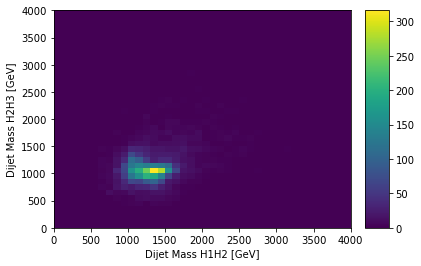

In [11]:
d1_hist.plot2d()